# Projektna naloga: Interval index
## 2.del - Iskanje maksimalne in minimalne vrendosti indeksa med vsemi kubičnimi grafi


$$
Int(G) = \sum_{\{u,v\} \subset V} \left( |I_G(u, v)| - 1 \right) 
$$ 
$$
I(u,v) = \{w \in V : d(u,w) + d(w,v) = d(u,v)\}
$$

In [1]:
from sage.graphs.graph import Graph
from sage.graphs.graph_generators import graphs
import random
from random import choice
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def interval_index(G):

    V = G.vertices()  # dobimo vsa vozlišča
    Int_G = 0
    
    # Iteriramo cez  vse pare vozlišč {u, v}
    for u in V:
        for v in V:
            # Izognemo se dvojnemu stetju (u,v) in (v,u) in (u,u)!
            if u >= v:
                continue
            d_uv = G.distance(u, v)    # poiscemo razdaljo
            
            interval_size = 0   # števec za |I(u,v)|
            
            for w in V:
                d_uw = G.distance(u, w)
                d_wv = G.distance(w, v)
                
                if d_uw + d_wv == d_uv:
                    interval_size += 1
            
            Int_G += (interval_size - 1)
            
            
    return Int_G

#### Metahevristično iskanje - Hill-Climbing algortiem
Namesto da pogledamo vse možnosti za kubične grafe, začnemo z nekim grafom in naredimo majhno spremembo ("tweak"), potem pa pogledamo, če ima nov graf boljši intervalni indeks in če ja, ga obdržimo, nato pa spet ponovimo postopek.

In [3]:
def graf_lastnosti(G):
    lastnosti = {
        "Intervalni indeks": interval_index(G),
        "Premer (diameter)": G.diameter(),     # najdaljša možna razdalja med dvema vozliščema
        "Radij (radius)": G.radius(),          # dolžina najdaljše najkrajše poti od v do katerega koli drugega vozlišča v grafu
        "Obseg (girth)": G.girth(),            # dolžina najmanjšega cikla
        "dvodelen?": G.is_bipartite(),    
        "Število vozlišč": G.order(),
        "Število robov": G.size(),
        "Hamiltonov?": G.is_hamiltonian()
    }
    return lastnosti

Testiranje zgornje funkcije na grafu iz 1. dela (naključni graf na 100 vozliščih, ki ima največji intervalni indeks)

In [4]:
G = Graph("~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOTA\XTXis?ROYfKORGoAAgp?bJC`TBSGGC_IT]?d?SRW?AfiAvAFJPEAB_gu_WGO_@G_abFM?@k?oOio_dGP?`B[@SE`cCg@]THSq?CFaova@G`GyBAH?TPDW_AmGOP_TZ?CaTsxAl?g?SS`_peCDGDdY?_]IG`??G`Pm@_]agAK`Am_qIYP[G?H}ke_QOGD@[QA?_b?MMV|]_?@_NE_pQ?A_}bZ??C?ONP?[D?pbCGaC?moCOiSWo?oPN_W`QCGKGGCcTMR@_hDaI_o?bCyXg_PSUcL?ZBUCW_eKTSHKOaOdwgBEKOSIcOIJyUY?AT?OnfD[gE?`?gWOAADrC?jCF?SOOGUCQ?aZCAL?XONWA@FOG@_HCW@wah@BTCsODbOg[?_???bGaR_?AYp?A@BoAF??sACg_P?BZ?BgaAJHTRRaO@`KKID[PP@nt[S`O?y_?OgcG@?u?PCAKQ?aG?NO?eA_oHCJA?aUC_?NC?CE[?HMCmO@RL@EHE@CWD_J`SWcCY@?tDdSk?dBqHACAKFaZIIW_B??@sFbO|TC?eAAdQ??c@]gWjsgPAKpJsu_noEcHPOCK?@GUAOA?BahMO?HSoEMHFc@qW[AgnBRhp_Q@B`GZ?KcOK?a?PPRTP?xDImFuYeqP@if]EbwbAOHwh?N_A@gBd_?AYPLAB_`QC@G|{@iV?C?DPCCpXm]gHHP__Om[EVEKWK?rc`mWAOmR?V?BSC`]FHKciScaEKj?bHCbCoga@qOd?dG??v`_WH_O?G????BXGpnBgC??_I_")
graf_lastnosti(G)

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
/tmp/ipykernel_491/2490477580.py:1: SyntaxWarning: invalid escape sequence '\X'
  G = Graph("~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOTA\XTXis?ROYfKORGoAAgp?bJC`TBSGGC_IT]?d?SRW?AfiAvAFJPEAB_gu_WGO_@G_abFM?@k?oOio_dGP?`B[@SE`cCg@]THSq?CFaova@G`GyBAH?TPDW_AmGOP_TZ?CaTsxAl?g?SS`_peCDGDdY?_]IG`??G`Pm@_]agAK`Am_qIYP[G?H}ke_QOGD@[QA?_b?MMV|]_?@_NE_pQ?A_}bZ??C?ONP?[D?pbCGaC?moCOiSWo?oPN_W`QCGKGGCcTMR@_hDaI_o?bCyXg_PSUcL?ZBUCW_eKTSHKOaOdwgBEKOSIcOIJyUY?AT?OnfD[gE?`?gWOAADrC?jCF?SOOGUCQ?aZCAL?XONWA@FOG@_HCW@wah@BTCsODbOg[?_???bGaR_?AYp?A@BoAF??sACg_P?BZ?BgaAJHTRRaO@`KKID[PP@nt[S`O?y_?OgcG@?u?PCAKQ?aG?NO?eA_oHCJA?aUC_?NC?CE[?HMCmO@RL@EHE@CWD_J`SWcCY@?tDdSk?dBqHACAKFaZIIW_B??@sFbO|TC?eAAdQ??c@]gWjsgPAKpJsu_noEcHPOCK?@GUAOA?BahMO?HSoEMHFc@qW[AgnBRhp_Q@B`GZ?KcOK?a?PPRTP?xDImFuYeqP@if]EbwbAOHwh?N_A@gBd_?AYPLAB_`QC@G|{@iV?C?DPCCpXm]gHHP__Om[EVEKWK?rc`mWAOmR?V?BSC`]FHKciScaEKj?bHCbCoga@qOd?dG??v`_W

{'Intervalni indeks': 37805,
 'Premer (diameter)': 2,
 'Radij (radius)': 2,
 'Obseg (girth)': 3,
 'dvodelen?': False,
 'Število vozlišč': 100,
 'Število robov': 1554,
 'Hamiltonov?': True}

In [5]:
def spremeni_kubicni_graf(G):

    """ Majhna nakjucna sprememba na kubičnem grafu"""

    H = G.copy()
    edges = list(H.edges(labels=False))   # seznam vseh robov (pari vozlisc --> npr. (o,1))

    
    # Izberemo dva roba
    for _ in range(20):     # poskusimo 20-krat, da najde dober swap
        e1 = choice(edges)  # choice za naklucje
        e2 = choice(edges)
        a, b = e1
        c, d = e2
        if len({a, b, c, d}) != 4:    #da so razlicna
            continue
        
        # Poskusimo prvi swap: a-c in b-d
        H.delete_edges([e1, e2])
        H.add_edge(a, c)
        H.add_edge(b, d)
        if all(H.degree(v) == 3 for v in H.vertices()):   #samo preverimo da stopnja ostane 3
            return H
        
        # Če ne, vrnemo nazaj in poskusimo drugi swap: a-d in b-c
        H.delete_edge(a, c)
        H.delete_edge(b, d)
        H.add_edge(a, d)
        H.add_edge(b, c)
        if all(H.degree(v) == 3 for v in H.vertices()):
            return H
        
        # Ce noben ne uspe, vrenmo nazaj
        H.add_edge(a, c)
        H.add_edge(b, d)
        H.delete_edge(a, d)
        H.delete_edge(b, c)
        H.add_edges([e1, e2])
    
    return G  

In [6]:
def metahevristika_kubicni(n, iteracije = 20000, smer = "max"):
    if n % 2 != 0:
        print("n mora biti sodo")
        return None
    
    G = graphs.RandomRegular(3, n)      # Zacetni (naključni povezan kubični)
    while not G.is_connected():
        G = graphs.RandomRegular(3, n)
    
    ekstrem = interval_index(G)
    najboljši_graf = G.copy()
    
    print(f" Začetni Int(G) = {ekstrem} ")
    
    for i in range(iteracije):
        H = spremeni_kubicni_graf(G)
        if not H.is_connected():
            continue
        val = interval_index(H)
        if val is None:
            continue
        
        # Za max
        if smer == "max" and val > ekstrem:
            ekstrem = val
            najboljši_graf = H.copy()
            G = H                  # nadaljujemo iz boljšega
            print(f" Nov max: {ekstrem} (korak {i})")
        
        # Za min
        elif smer == "min" and val < ekstrem:
            ekstrem = val
            najboljši_graf = H.copy()
            G = H
            print(f" Nov min: {ekstrem} (korak {i})")
    
    return najboljši_graf, ekstrem

In [7]:
def sistematicni_kubicni(n, smer= "max"):

    """Za vse grafe na n vozliščih iščemo najboljšega """
    if n % 2 != 0:
        print("n mora biti sodo")
        return None
    
    ekstrem = -1 if smer == "max" else float('inf')
    najboljši_graf = None
    
    for G in graphs.nauty_geng(f"{n} -c -d3 -D3"):  # vsi povezani kubični, d3 je minimlna stopjna in D3 maksimalna
        val = interval_index(G)
        if (smer == "max" and val > ekstrem) or (smer == "min" and val < ekstrem):
            ekstrem = val
            najboljši_graf = G.copy()
            print(f"Nov ekstrem: {ekstrem}")
    
    return najboljši_graf, ekstrem



In [8]:
# Glavna funkcija s pomočjo metahevristike in nauty_geng 
def najdi_ekstreme_kubicni(n, iteracije = 10000):

    if n <= 12:  # za majhne n: sistematično
        print("Sistematičen pregled za majhno n...")
        graf_max, max_val = sistematicni_kubicni(n, "max")
        graf_min, min_val = sistematicni_kubicni(n, "min")

    else:  # za velika n: metahevristika
        print("Metahevristika za veliko n...")
        graf_max, max_val = metahevristika_kubicni(n, iteracije, "max")
        graf_min, min_val = metahevristika_kubicni(n, iteracije, "min")
    

    print("\n=== MAKSIMALNI GRAF ===")
    print(graf_lastnosti(graf_max))
    graf_max.show(title= f"Max Int(G) = {max_val}")
    
    print("\n=== MINIMALNI GRAF ===")
    print(graf_lastnosti(graf_min))
    graf_min.show(title= f"Min Int(G) = {min_val}")


    


#### Pregled za vse grafe za n < 27


Sistematičen pregled za majhno n...
Nov ekstrem: 6
Nov ekstrem: 6

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 6, 'Premer (diameter)': 1, 'Radij (radius)': 1, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 4, 'Število robov': 6, 'Hamiltonov?': True}


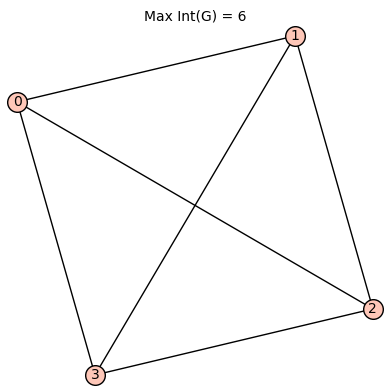


=== MINIMALNI GRAF ===
{'Intervalni indeks': 6, 'Premer (diameter)': 1, 'Radij (radius)': 1, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 4, 'Število robov': 6, 'Hamiltonov?': True}


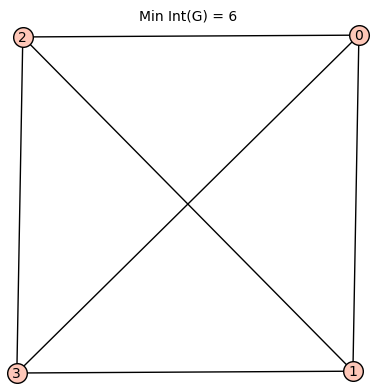

Sistematičen pregled za majhno n...
Nov ekstrem: 33
Nov ekstrem: 33
Nov ekstrem: 27

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 33, 'Premer (diameter)': 2, 'Radij (radius)': 2, 'Obseg (girth)': 4, 'dvodelen?': True, 'Število vozlišč': 6, 'Število robov': 9, 'Hamiltonov?': True}


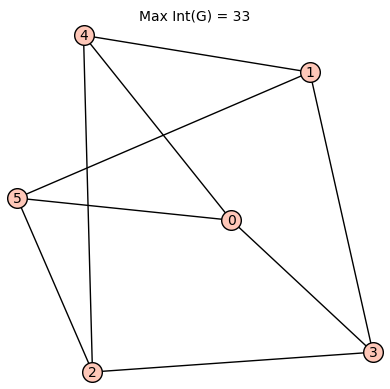


=== MINIMALNI GRAF ===
{'Intervalni indeks': 27, 'Premer (diameter)': 2, 'Radij (radius)': 2, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 6, 'Število robov': 9, 'Hamiltonov?': True}


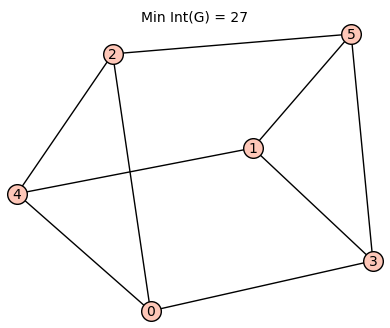

Sistematičen pregled za majhno n...
Nov ekstrem: 76
Nov ekstrem: 76
Nov ekstrem: 52
Nov ekstrem: 49

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 76, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 4, 'dvodelen?': True, 'Število vozlišč': 8, 'Število robov': 12, 'Hamiltonov?': True}


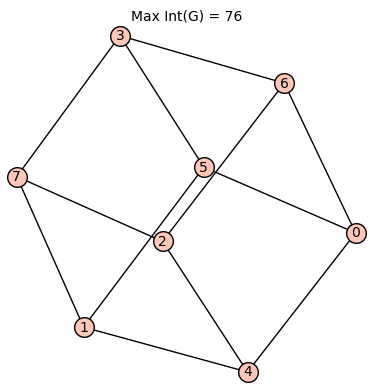


=== MINIMALNI GRAF ===
{'Intervalni indeks': 49, 'Premer (diameter)': 2, 'Radij (radius)': 2, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 8, 'Število robov': 12, 'Hamiltonov?': True}


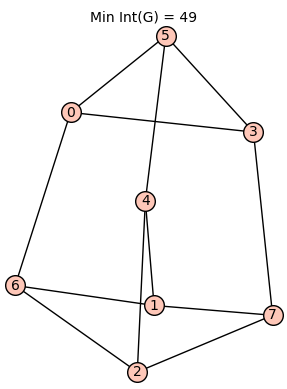

Sistematičen pregled za majhno n...
Nov ekstrem: 135
Nov ekstrem: 139
Nov ekstrem: 135
Nov ekstrem: 115
Nov ekstrem: 107
Nov ekstrem: 99
Nov ekstrem: 75

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 139, 'Premer (diameter)': 5, 'Radij (radius)': 3, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 10, 'Število robov': 15, 'Hamiltonov?': False}


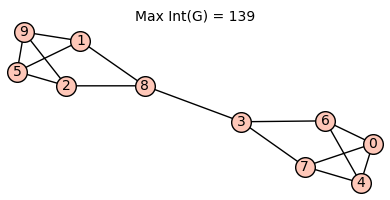


=== MINIMALNI GRAF ===
{'Intervalni indeks': 75, 'Premer (diameter)': 2, 'Radij (radius)': 2, 'Obseg (girth)': 5, 'dvodelen?': False, 'Število vozlišč': 10, 'Število robov': 15, 'Hamiltonov?': False}


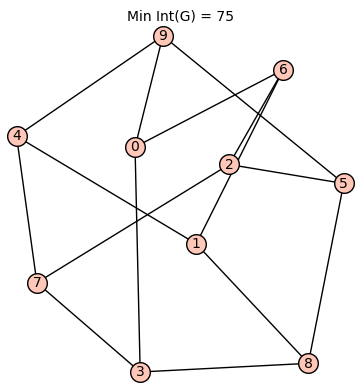

Sistematičen pregled za majhno n...
Nov ekstrem: 234
Nov ekstrem: 234
Nov ekstrem: 228
Nov ekstrem: 218
Nov ekstrem: 210
Nov ekstrem: 174
Nov ekstrem: 165
Nov ekstrem: 154
Nov ekstrem: 146

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 234, 'Premer (diameter)': 4, 'Radij (radius)': 4, 'Obseg (girth)': 4, 'dvodelen?': True, 'Število vozlišč': 12, 'Število robov': 18, 'Hamiltonov?': True}


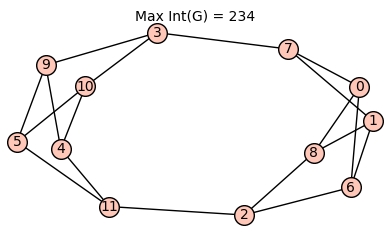


=== MINIMALNI GRAF ===
{'Intervalni indeks': 146, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 12, 'Število robov': 18, 'Hamiltonov?': True}


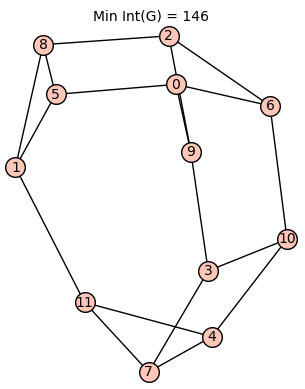

Metahevristika za veliko n...
 Začetni Int(G) = 253 
 Nov max: 267 (korak 9)
 Nov max: 291 (korak 10)
 Nov max: 295 (korak 42)
 Nov max: 296 (korak 54)
 Nov max: 321 (korak 95)
 Nov max: 330 (korak 111)
 Nov max: 385 (korak 122)
 Nov max: 401 (korak 151)
 Začetni Int(G) = 268 
 Nov min: 223 (korak 2)
 Nov min: 217 (korak 27)
 Nov min: 215 (korak 98)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 401, 'Premer (diameter)': 8, 'Radij (radius)': 4, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 14, 'Število robov': 21, 'Hamiltonov?': False}


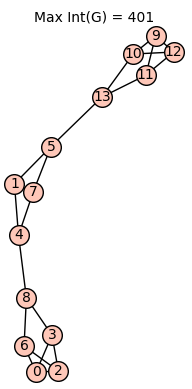


=== MINIMALNI GRAF ===
{'Intervalni indeks': 215, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 14, 'Število robov': 21, 'Hamiltonov?': True}


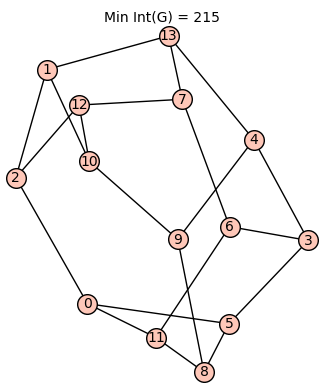

Metahevristika za veliko n...
 Začetni Int(G) = 404 
 Nov max: 413 (korak 2)
 Nov max: 484 (korak 9)
 Nov max: 490 (korak 17)
 Nov max: 557 (korak 63)
 Nov max: 579 (korak 260)
 Začetni Int(G) = 390 
 Nov min: 349 (korak 1)
 Nov min: 338 (korak 8)
 Nov min: 337 (korak 41)
 Nov min: 331 (korak 42)
 Nov min: 327 (korak 52)
 Nov min: 317 (korak 60)
 Nov min: 307 (korak 144)
 Nov min: 303 (korak 178)
 Nov min: 298 (korak 292)
 Nov min: 294 (korak 293)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 579, 'Premer (diameter)': 9, 'Radij (radius)': 5, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 16, 'Število robov': 24, 'Hamiltonov?': False}


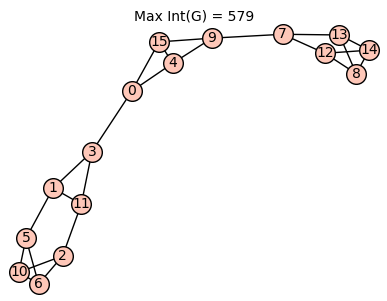


=== MINIMALNI GRAF ===
{'Intervalni indeks': 294, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 16, 'Število robov': 24, 'Hamiltonov?': True}


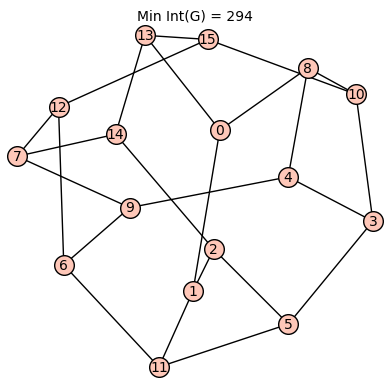

Metahevristika za veliko n...
 Začetni Int(G) = 459 
 Nov max: 475 (korak 4)
 Nov max: 503 (korak 5)
 Nov max: 515 (korak 6)
 Nov max: 520 (korak 7)
 Nov max: 531 (korak 11)
 Nov max: 541 (korak 12)
 Nov max: 545 (korak 24)
 Nov max: 550 (korak 30)
 Nov max: 571 (korak 35)
 Nov max: 575 (korak 52)
 Nov max: 576 (korak 54)
 Nov max: 592 (korak 60)
 Nov max: 602 (korak 80)
 Nov max: 621 (korak 87)
 Nov max: 633 (korak 91)
 Nov max: 643 (korak 103)
 Nov max: 657 (korak 121)
 Nov max: 671 (korak 137)
 Nov max: 678 (korak 168)
 Nov max: 685 (korak 177)
 Nov max: 691 (korak 185)
 Nov max: 739 (korak 217)
 Nov max: 757 (korak 254)
 Začetni Int(G) = 500 
 Nov min: 476 (korak 3)
 Nov min: 466 (korak 4)
 Nov min: 443 (korak 11)
 Nov min: 433 (korak 55)
 Nov min: 429 (korak 97)
 Nov min: 415 (korak 257)
 Nov min: 409 (korak 281)
 Nov min: 403 (korak 293)
 Nov min: 383 (korak 1396)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 757, 'Premer (diameter)': 7, 'Radij (radius)': 4, 'Obseg (girth)': 4, 

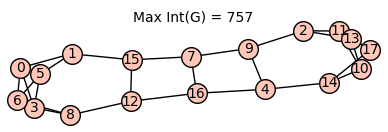


=== MINIMALNI GRAF ===
{'Intervalni indeks': 383, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 5, 'dvodelen?': False, 'Število vozlišč': 18, 'Število robov': 27, 'Hamiltonov?': True}


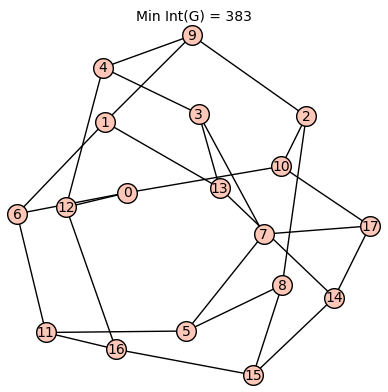

Metahevristika za veliko n...
 Začetni Int(G) = 650 
 Nov max: 662 (korak 0)
 Nov max: 677 (korak 5)
 Nov max: 679 (korak 13)
 Nov max: 748 (korak 15)
 Nov max: 775 (korak 33)
 Nov max: 792 (korak 36)
 Nov max: 811 (korak 89)
 Nov max: 916 (korak 114)
 Nov max: 1052 (korak 348)
 Začetni Int(G) = 650 
 Nov min: 644 (korak 0)
 Nov min: 634 (korak 2)
 Nov min: 624 (korak 3)
 Nov min: 614 (korak 7)
 Nov min: 605 (korak 18)
 Nov min: 593 (korak 23)
 Nov min: 583 (korak 28)
 Nov min: 577 (korak 36)
 Nov min: 567 (korak 50)
 Nov min: 565 (korak 57)
 Nov min: 562 (korak 63)
 Nov min: 549 (korak 81)
 Nov min: 546 (korak 86)
 Nov min: 530 (korak 110)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 1052, 'Premer (diameter)': 10, 'Radij (radius)': 5, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 20, 'Število robov': 30, 'Hamiltonov?': False}


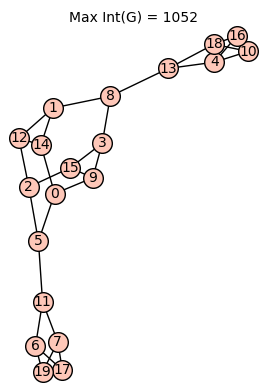


=== MINIMALNI GRAF ===
{'Intervalni indeks': 530, 'Premer (diameter)': 4, 'Radij (radius)': 3, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 20, 'Število robov': 30, 'Hamiltonov?': True}


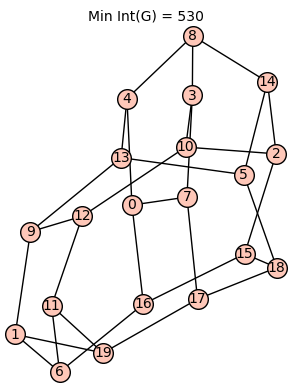

Metahevristika za veliko n...
 Začetni Int(G) = 855 
 Nov max: 866 (korak 6)
 Nov max: 875 (korak 12)
 Nov max: 892 (korak 16)
 Nov max: 910 (korak 21)
 Nov max: 923 (korak 23)
 Nov max: 999 (korak 36)
 Nov max: 1019 (korak 38)
 Nov max: 1034 (korak 60)
 Nov max: 1050 (korak 123)
 Nov max: 1101 (korak 161)
 Nov max: 1146 (korak 181)
 Nov max: 1175 (korak 209)
 Nov max: 1208 (korak 450)
 Nov max: 1332 (korak 574)
 Nov max: 1380 (korak 684)
 Začetni Int(G) = 911 
 Nov min: 895 (korak 1)
 Nov min: 875 (korak 2)
 Nov min: 783 (korak 4)
 Nov min: 775 (korak 9)
 Nov min: 763 (korak 13)
 Nov min: 743 (korak 14)
 Nov min: 740 (korak 18)
 Nov min: 737 (korak 40)
 Nov min: 724 (korak 44)
 Nov min: 718 (korak 223)
 Nov min: 697 (korak 260)
 Nov min: 695 (korak 291)
 Nov min: 687 (korak 329)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 1380, 'Premer (diameter)': 10, 'Radij (radius)': 5, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 22, 'Število robov': 33, 'Hamiltonov?': False}


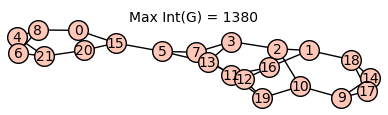


=== MINIMALNI GRAF ===
{'Intervalni indeks': 687, 'Premer (diameter)': 4, 'Radij (radius)': 4, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 22, 'Število robov': 33, 'Hamiltonov?': True}


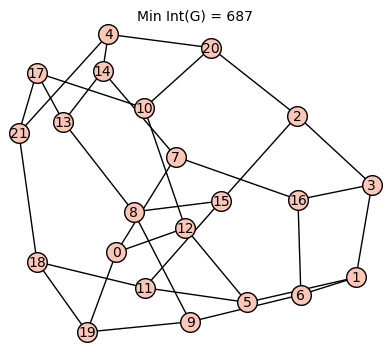

Metahevristika za veliko n...
 Začetni Int(G) = 1056 
 Nov max: 1058 (korak 1)
 Nov max: 1060 (korak 2)
 Nov max: 1100 (korak 3)
 Nov max: 1240 (korak 4)
 Nov max: 1261 (korak 6)
 Nov max: 1305 (korak 11)
 Nov max: 1323 (korak 19)
 Nov max: 1354 (korak 42)
 Nov max: 1384 (korak 122)
 Nov max: 1416 (korak 126)
 Nov max: 1446 (korak 134)
 Nov max: 1508 (korak 184)
 Nov max: 1864 (korak 203)
 Nov max: 1875 (korak 275)
 Nov max: 1901 (korak 755)
 Nov max: 1953 (korak 1146)
 Nov max: 1999 (korak 1535)
 Začetni Int(G) = 1042 
 Nov min: 998 (korak 0)
 Nov min: 956 (korak 3)
 Nov min: 942 (korak 32)
 Nov min: 916 (korak 41)
 Nov min: 884 (korak 43)
 Nov min: 875 (korak 53)
 Nov min: 850 (korak 67)
 Nov min: 846 (korak 125)
 Nov min: 835 (korak 396)
 Nov min: 826 (korak 400)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 1999, 'Premer (diameter)': 13, 'Radij (radius)': 7, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 24, 'Število robov': 36, 'Hamiltonov?': False}


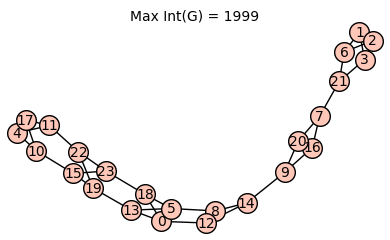


=== MINIMALNI GRAF ===
{'Intervalni indeks': 826, 'Premer (diameter)': 4, 'Radij (radius)': 4, 'Obseg (girth)': 5, 'dvodelen?': False, 'Število vozlišč': 24, 'Število robov': 36, 'Hamiltonov?': True}


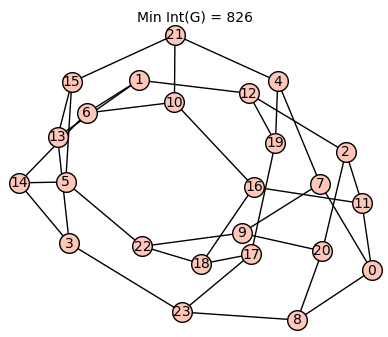

Metahevristika za veliko n...
 Začetni Int(G) = 1260 
 Nov max: 1290 (korak 0)
 Nov max: 1341 (korak 4)
 Nov max: 1351 (korak 5)
 Nov max: 1425 (korak 6)
 Nov max: 1514 (korak 7)
 Nov max: 1530 (korak 8)
 Nov max: 1634 (korak 28)
 Nov max: 1698 (korak 49)
 Nov max: 1792 (korak 68)
 Nov max: 1921 (korak 480)
 Nov max: 1930 (korak 498)
 Nov max: 2119 (korak 515)
 Nov max: 2153 (korak 530)
 Nov max: 2156 (korak 644)
 Nov max: 2159 (korak 664)
 Nov max: 2243 (korak 809)
 Nov max: 2277 (korak 843)
 Začetni Int(G) = 1287 
 Nov min: 1281 (korak 0)
 Nov min: 1218 (korak 1)
 Nov min: 1195 (korak 5)
 Nov min: 1171 (korak 9)
 Nov min: 1159 (korak 11)
 Nov min: 1147 (korak 19)
 Nov min: 1096 (korak 39)
 Nov min: 1087 (korak 42)
 Nov min: 1078 (korak 82)
 Nov min: 1060 (korak 99)
 Nov min: 1057 (korak 154)
 Nov min: 1046 (korak 294)
 Nov min: 1025 (korak 363)
 Nov min: 1023 (korak 406)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 2277, 'Premer (diameter)': 11, 'Radij (radius)': 6, 'Obseg (girth)'

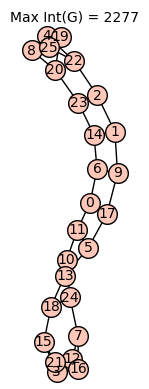


=== MINIMALNI GRAF ===
{'Intervalni indeks': 1023, 'Premer (diameter)': 5, 'Radij (radius)': 4, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 26, 'Število robov': 39, 'Hamiltonov?': True}


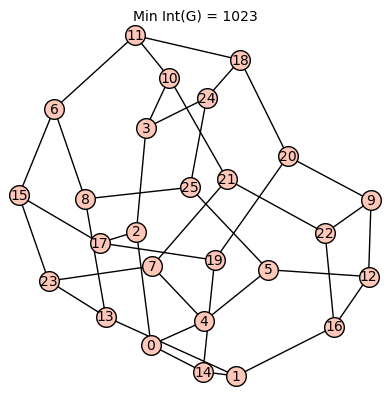

In [9]:
for i in range(3, 27):
    if i % 2 == 0:  
        najdi_ekstreme_kubicni(i, iteracije = 20000) #
    else:
        continue